In [1]:
import pandas as pd
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt
from numpy import where


In [38]:
df = pd.read_csv('/Users/reejungkim/Documents/python functions/creditcard 2.csv')


In [39]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


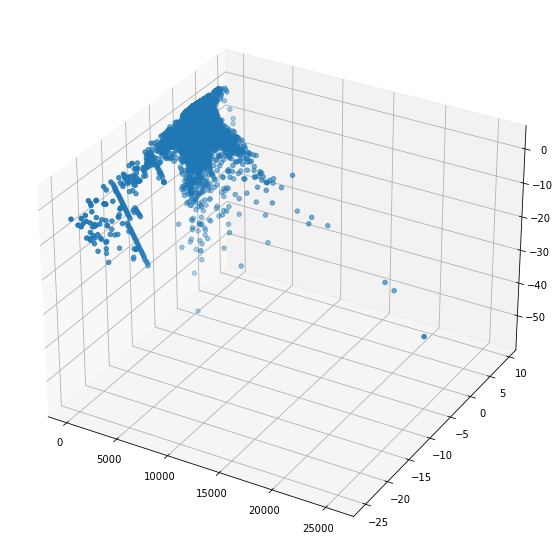

In [44]:

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

x= df.Amount
y= df.V17
z= df.V1

ax.scatter(x, y, z)
plt.show()

In [45]:
df = df[['Amount','V17', 'V1']]

커널기법 적용. 비선형의 단점 보환. 
데이터를 확장하지 않고 확장된 특성에 대해 데이터 포인트들의 거리를 계산.

nu = 0.03 means that the algorithm will designate 3% data as outliers.

Hyperparameter “nu” controls the sensitivity of the support vectors and should be tuned to the approximate ratio of outliers in the data.

gamma{‘scale’, ‘auto’} or float, default=’scale’
Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.

In [46]:
# model specification
model = OneClassSVM(kernel = 'rbf', gamma = 'scale', nu = 0.01).fit(df)


- Inlier Prediction: +1
- Outlier Prediction: -1


In [47]:
# prediction
y_pred = model.predict(df)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [48]:
# filter outlier index
outlier_index = where(y_pred == -1) 
# filter outlier values
outlier_values = df.iloc[outlier_index]
outlier_values

,Amount,V17,V1
164,3828.04,-0.497644,-6.093248
1027,1528.90,-0.705232,-3.900810
1281,1736.00,-0.278848,-2.960339
1388,2452.03,-0.853990,-3.936794
1632,7712.43,-1.654892,-11.140706
...,...,...,...
284383,1114.00,-0.974123,-0.065120
284497,1484.66,-0.484849,-0.801222
284528,900.00,0.368194,0.643223
284753,337.54,-0.234819,1.465737


/opt/anaconda3/envs/myenv/lib/python3.7/site-packages/matplotlib/collections.py:1003: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


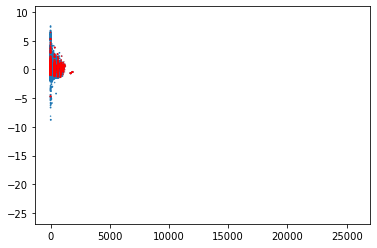

In [50]:
# visualize outputs
plt.scatter(df['Amount'] , df["V17"], df["V1"])
plt.scatter(outlier_values["Amount"], outlier_values["V17"], outlier_values["V1"], c = "r")


#calculate score
score = f1_score(testy, ypred, pos_label=-1)
print('F1 Score: %.3f' % score)

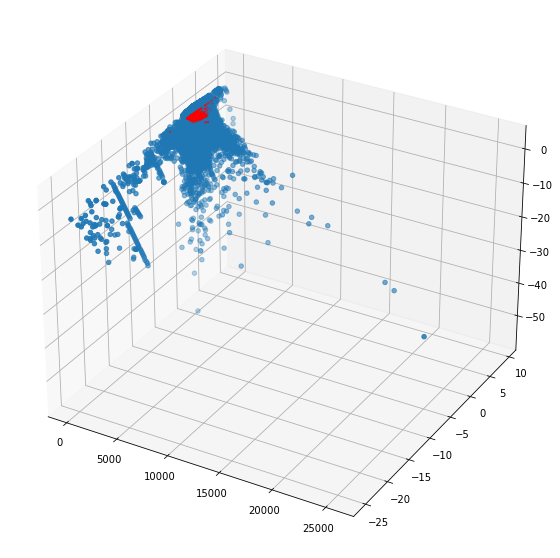

In [51]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

x= df.Amount
y= df.V17
z= df.V1

plt.scatter(outlier_values["Amount"], outlier_values["V17"],outlier_values["V1"], c = "r")

ax.scatter(x, y, z)
plt.show()